In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from math import *
from sklearn.model_selection import train_test_split

In [2]:
path = 'dataset'
all_files = glob.glob(path+'/*.csv')
df = pd.concat(pd.read_csv(f) for f in all_files)

In [3]:
cols = df.columns

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
frame,1006850.0,149.163353,86.176074,1.0,75.00,149.00,224.000,300.00
confidence,1006850.0,0.901667,0.146482,0.0,0.88,0.93,0.980,0.98
face_id,1006850.0,0.000000,0.000000,0.0,0.00,0.00,0.000,0.00
x_0,1006850.0,809.856749,217.602138,-1.1,711.80,841.60,946.700,1792.80
x_1,1006850.0,808.158277,216.833053,-1.7,709.50,840.10,946.400,1795.00
x_2,1006850.0,808.622990,215.891128,-0.9,711.10,840.60,947.500,1795.60
x_3,1006850.0,811.561491,214.204174,0.0,714.80,842.90,950.100,1797.30
x_4,1006850.0,818.777996,211.085332,0.0,723.50,848.10,955.100,1805.00
x_5,1006850.0,830.783987,207.420750,0.0,741.90,857.10,963.600,1817.70
x_6,1006850.0,846.098002,204.163776,0.0,765.50,868.00,974.900,1835.90


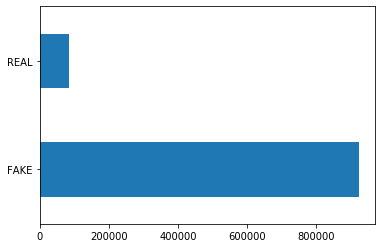

In [4]:
df['label'].value_counts().plot(kind='barh')

In [8]:
# need to bring in some more real data
# created on chosen csv using following command:
# grep -v ",FAKE" file_0.csv > real_0.csv
# fastest way to alter datafile
real_files = glob.glob(path+'/real/real_*.csv')
for f in real_files:
    df = pd.concat([df,pd.read_csv(f)])
df.shape

(1754608, 141)

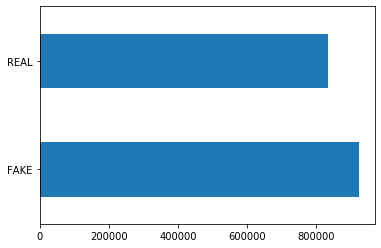

In [9]:
df['label'].value_counts().plot(kind='barh')

In [10]:
#sort dataset
df = df.sort_values(by=['filename','frame']).reset_index(drop=True)

In [11]:
df.to_csv('cleaned_data.csv', header=cols)

In [4]:
### Read in Dataframe
df = pd.read_csv('cleaned_data.csv', index_col=['filename', 'frame'])
df.isna().any().any()


/Users/kyramozley/Library/Python/3.7/lib/python/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


False

In [10]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

confidence  face_id    x_0    x_1    x_2    x_3    x_4  \
filename       frame                                                           
aaaoqepxnf.mp4 1            0.93        0  881.2  880.9  883.3  887.6  893.6   
               2            0.93        0  881.4  880.9  883.3  887.6  893.7   
               3            0.98        0  881.5  880.9  883.3  887.8  893.8   
               4            0.98        0  881.7  881.2  883.6  888.0  894.0   
               5            0.98        0  882.0  881.4  883.9  888.3  894.3   
               6            0.98        0  882.2  881.6  884.0  888.4  894.3   
               7            0.98        0  882.4  881.8  884.1  888.4  894.3   
               8            0.98        0  882.7  882.1  884.4  888.7  894.6   
               9            0.98        0  882.7  882.1  884.5  888.9  894.8   
               10           0.98        0  882.9  882.4  884.8  889.1  895.0   
               11           0.98        0  883.3  882.8  885.2  889.5  895.3   
               12           0.98        0  883.4  882.9  885.3  889.6  895.4   
               13           0.98        0  883.4  882.9  885.4  889.7  895.6   
               14           0.98        0  883.6  883.1  885.5  889.9  895.9   
               15           0.98        0  883.6  883.1  885.6  889.9  895.9   
               16           0.98        0  883.7  883.2  885.8  890.2  896.2   
               17           0.98        0  883.7  883.3  885.9  890.3  896.4   
               18           0.98        0  883.7  883.3  885.8  890.2  896.2   
               19           0.98        0  883.7  883.3  885.8  890.2  896.1   
               20           0.98        0  883.6  883.2  885.7  890.1  896.1   
               21           0.98        0  883.5  883.1  885.7  890.1  896.1   
               22           0.98        0  883.5  883.1  885.6  890.1  896.1   
               23           0.98        0  883.4  883.1  885.6  890.0  896.0   
               24           0.98        0  883.4  883.0  885.6  890.0  896.0   
               25           0.98        0  883.3  882.9  885.5  889.9  895.9   
               26           0.98        0  883.1  882.8  885.4  889.8  895.7   
               27           0.98        0  883.1  882.7  885.3  889.6  895.6   
               28           0.98        0  883.0  882.6  885.2  889.6  895.6   
               29           0.98        0  882.9  882.5  885.1  889.5  895.4   
               30           0.98        0  882.7  882.4  884.9  889.3  895.3   
...                          ...      ...    ...    ...    ...    ...    ...   
zzpbsapyyf.mp4 271          0.98        0  720.2  720.6  722.6  726.9  734.1   
               272          0.98        0  720.2  720.6  722.5  726.5  733.6   
               273          0.98        0  720.2  720.6  722.5  726.5  733.6   
               274          0.98        0  720.1  720.6  722.4  726.4  733.3   
               275          0.98        0  720.0  720.3  722.0  725.7  732.5   
               276          0.98        0  719.9  720.1  721.5  725.0  731.6   
               277          0.98        0  719.9  720.0  721.3  724.6  731.0   
               278          0.98        0  719.8  719.8  721.0  724.2  730.4   
               279          0.98        0  719.7  719.8  720.9  724.0  730.2   
               280          0.98        0  719.7  719.8  720.9  724.1  730.3   
               281          0.98        0  719.7  719.8  721.0  724.1  730.3   
               282          0.98        0  719.7  719.8  721.0  724.1  730.3   
               283          0.98        0  719.7  719.8  721.0  724.2  730.5   
               284          0.98        0  719.7  719.8  721.0  724.2  730.6   
               285          0.98        0  719.8  719.8  721.0  724.3  730.6   
               286          0.98        0  719.8  719.8  720.9  724.2  730.4   
               287          0.98        0  719.8  719.8  721.0  724.2  730.3   
               288    

In [31]:
#try on first file
test = df[df.index.get_level_values('filename').str.startswith('aaaoqepxnf.mp4')]
# get average distance between frames
#frame 2->300
# landmark points (x_0, y_0) -> (x_67, y_67)
points = list(zip(test.x_0, test.y_0))
d = np.diff(points, axis=0)
x_0 = np.sqrt((d ** 2).sum(axis=1))

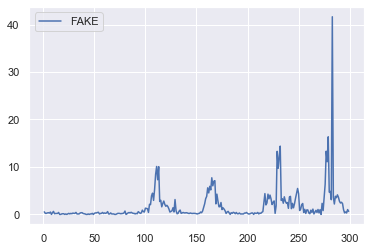

In [42]:
sns.lineplot(x=range(1,300), y=x_0, label='FAKE', markers=True)


In [35]:
#try on first file
test = df[df.index.get_level_values('filename').str.startswith('aagumdmtjk.mp4')]
# get average distance between frames
#frame 2->300
# landmark points (x_0, y_0) -> (x_67, y_67)
points = list(zip(test.x_0, test.y_0))
d = np.diff(points, axis=0)
x_0_real = np.sqrt((d ** 2).sum(axis=1))

Text(0, 0.5, 'Euclidian Distance')

<Figure size 2160x1440 with 0 Axes>

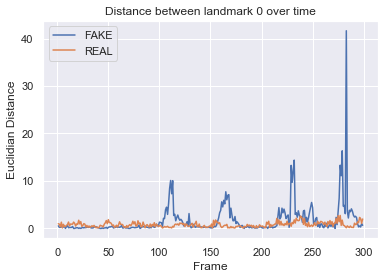

In [52]:
#sns.lineplot(x=range(1,300), y=x_0_real, label='REAL', markers=True)
plt.figure(figsize=(30,20))
fig, ax = plt.subplots()
ax= sns.lineplot(x=range(1,300), y=x_0, label='FAKE', markers=True)
ax1 = sns.lineplot(x=range(1,300), y=x_0_real, label='REAL')
plt.title('Distance between landmark 0 over time')
plt.xlabel('Frame')
plt.ylabel('Euclidian Distance (mm)')


In [123]:
# group dataframe into real and fake videos
df_fake = df[df.label=='FAKE']
df_real = df[df.label=='REAL']

In [127]:
for i in range(0,68):
    print(i)
    #points = ['x_{}'.format(i), 'y_{}'.format(i)]
    #df_fake['landmark_{}'.format(i)] = df_fake[points].values.tolist()
    #df_fake = df_fake.drop([points[0], points[1]], axis=1)
    x = df_real.groupby('filename')['x_{}'.format(i)].diff()
    y = df_real.groupby('filename')['y_{}'.format(i)].diff()
    df_real['landmark_{}'.format(i)] = np.sqrt(x**2 + y**2)
df_real

0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67


confidence  face_id    x_0    x_1    x_2    x_3    x_4  \
filename       frame                                                           
aagumdmtjk.mp4 1            0.98        0  952.0  951.3  951.9  953.6  957.8   
               2            0.98        0  952.9  952.2  952.7  954.3  958.4   
               3            0.98        0  953.0  952.2  952.7  954.3  958.2   
               4            0.98        0  953.2  952.2  952.5  953.9  957.8   
               5            0.98        0  953.0  952.1  952.3  953.6  957.4   
               6            0.98        0  953.0  951.9  952.1  953.7  957.6   
               7            0.93        0  952.3  951.4  951.8  953.6  957.8   
               8            0.98        0  952.0  951.1  951.6  953.4  957.6   
               9            0.98        0  951.6  950.8  951.3  953.0  957.2   
               10           0.93        0  951.2  950.5  951.0  952.8  956.9   
               11           0.98        0  951.3  950.5  950.8  952.5  956.1   
               12           0.98        0  950.7  949.9  950.3  951.9  955.5   
               13           0.98        0  950.5  949.6  949.9  951.3  954.8   
               14           0.98        0  949.9  949.0  949.0  950.3  953.9   
               15           0.98        0  950.3  949.1  948.8  949.8  953.2   
               16           0.98        0  950.7  949.4  948.9  949.6  952.7   
               17           0.98        0  951.0  949.6  949.1  949.7  952.9   
               18           0.98        0  951.4  949.8  949.1  949.6  952.5   
               19           0.98        0  951.4  949.8  949.1  949.5  952.3   
               20           0.98        0  951.1  949.4  948.7  949.1  951.8   
               21           0.98        0  950.5  948.8  948.2  948.7  951.5   
               22           0.98        0  948.8  947.1  946.4  947.0  949.8   
               23           0.98        0  947.9  946.1  945.4  946.1  948.8   
               24           0.98        0  946.5  944.7  944.1  944.8  947.8   
               25           0.98        0  946.1  944.3  943.6  944.3  947.1   
               26           0.98        0  945.5  943.7  943.2  943.9  946.7   
               27           0.98        0  944.5  942.9  942.4  943.2  946.0   
               28           0.98        0  943.6  942.2  941.8  942.7  945.6   
               29           0.98        0  943.4  941.8  941.5  942.3  945.1   
               30           0.98        0  943.0  941.4  941.1  942.0  944.9   
...                          ...      ...    ...    ...    ...    ...    ...   
zzpbsapyyf.mp4 271          0.98        0  720.2  720.6  722.6  726.9  734.1   
               272          0.98        0  720.2  720.6  722.5  726.5  733.6   
               273          0.98        0  720.2  720.6  722.5  726.5  733.6   
               274          0.98        0  720.1  720.6  722.4  726.4  733.3   
               275          0.98        0  720.0  720.3  722.0  725.7  732.5   
               276          0.98        0  719.9  720.1  721.5  725.0  731.6   
               277          0.98        0  719.9  720.0  721.3  724.6  731.0   
               278          0.98        0  719.8  719.8  721.0  724.2  730.4   
               279          0.98        0  719.7  719.8  720.9  724.0  730.2   
               280          0.98        0  719.7  719.8  720.9  724.1  730.3   
               281          0.98        0  719.7  719.8  721.0  724.1  730.3   
               282          0.98        0  719.7  719.8  721.0  724.1  730.3   
               283          0.98        0  719.7  719.8  721.0  724.2  730.5   
               284          0.98        0  719.7  719.8  721.0  724.2  730.6   
               285          0.98        0  719.8  719.8  721.0  724.3  730.6   
               286          0.98        0  719.8  719.8  720.9  724.2  730.4   
               287          0.98        0  719.8  719.8  721.0  724.2  730.3   
               288    

In [129]:
df_real.to_csv('cleaned_data_real.csv', header=df_real.columns, index=['filename','frame'])

In [130]:
for i in range(0,68):
    print(i)
    #points = ['x_{}'.format(i), 'y_{}'.format(i)]
    #df_fake['landmark_{}'.format(i)] = df_fake[points].values.tolist()
    #df_fake = df_fake.drop([points[0], points[1]], axis=1)
    x = df_fake.groupby('filename')['x_{}'.format(i)].diff()
    y = df_fake.groupby('filename')['y_{}'.format(i)].diff()
    df_fake['landmark_{}'.format(i)] = np.sqrt(x**2 + y**2)
df_fake

0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67


confidence  face_id    x_0    x_1    x_2    x_3    x_4  \
filename       frame                                                           
aaaoqepxnf.mp4 1            0.93        0  881.2  880.9  883.3  887.6  893.6   
               2            0.93        0  881.4  880.9  883.3  887.6  893.7   
               3            0.98        0  881.5  880.9  883.3  887.8  893.8   
               4            0.98        0  881.7  881.2  883.6  888.0  894.0   
               5            0.98        0  882.0  881.4  883.9  888.3  894.3   
               6            0.98        0  882.2  881.6  884.0  888.4  894.3   
               7            0.98        0  882.4  881.8  884.1  888.4  894.3   
               8            0.98        0  882.7  882.1  884.4  888.7  894.6   
               9            0.98        0  882.7  882.1  884.5  888.9  894.8   
               10           0.98        0  882.9  882.4  884.8  889.1  895.0   
               11           0.98        0  883.3  882.8  885.2  889.5  895.3   
               12           0.98        0  883.4  882.9  885.3  889.6  895.4   
               13           0.98        0  883.4  882.9  885.4  889.7  895.6   
               14           0.98        0  883.6  883.1  885.5  889.9  895.9   
               15           0.98        0  883.6  883.1  885.6  889.9  895.9   
               16           0.98        0  883.7  883.2  885.8  890.2  896.2   
               17           0.98        0  883.7  883.3  885.9  890.3  896.4   
               18           0.98        0  883.7  883.3  885.8  890.2  896.2   
               19           0.98        0  883.7  883.3  885.8  890.2  896.1   
               20           0.98        0  883.6  883.2  885.7  890.1  896.1   
               21           0.98        0  883.5  883.1  885.7  890.1  896.1   
               22           0.98        0  883.5  883.1  885.6  890.1  896.1   
               23           0.98        0  883.4  883.1  885.6  890.0  896.0   
               24           0.98        0  883.4  883.0  885.6  890.0  896.0   
               25           0.98        0  883.3  882.9  885.5  889.9  895.9   
               26           0.98        0  883.1  882.8  885.4  889.8  895.7   
               27           0.98        0  883.1  882.7  885.3  889.6  895.6   
               28           0.98        0  883.0  882.6  885.2  889.6  895.6   
               29           0.98        0  882.9  882.5  885.1  889.5  895.4   
               30           0.98        0  882.7  882.4  884.9  889.3  895.3   
...                          ...      ...    ...    ...    ...    ...    ...   
zzeircwkbh.mp4 270          0.88        0  997.3  992.3  989.5  989.0  991.8   
               271          0.88        0  997.0  992.1  989.3  988.7  991.2   
               272          0.88        0  996.2  991.6  989.1  988.3  990.6   
               273          0.88        0  994.4  990.0  987.7  987.2  989.7   
               274          0.88        0  994.4  990.0  987.8  987.4  989.8   
               275          0.88        0  994.9  990.6  988.5  988.1  990.4   
               276          0.88        0  994.9  990.7  988.6  988.1  990.3   
               277          0.88        0  992.9  988.8  987.1  987.2  990.1   
               278          0.88        0  993.2  989.1  987.3  987.2  989.9   
               279          0.88        0  992.8  988.9  987.2  987.1  989.9   
               280          0.88        0  992.0  988.5  987.0  987.0  989.8   
               281          0.88        0  991.7  988.4  987.3  987.7  990.9   
               282          0.88        0  991.1  987.9  986.7  987.3  990.6   
               283          0.88        0  991.2  987.8  986.8  987.5  991.1   
               284          0.88        0  991.9  988.3  986.8  987.0  990.0   
               285          0.88        0  991.4  987.6  986.1  986.3  989.2   
               286          0.88        0  992.4  988.4  986.6  986.4  988.8   
               287    

In [136]:
df_fake.to_csv('cleaned_data_fake.csv', header=df_fake.columns, index=['filename','frame'])

In [2]:
df_fake = pd.read_csv('cleaned_data_fake.csv', header=0, index_col=['filename', 'frame'])
df_real = pd.read_csv('cleaned_data_real.csv', header=0, index_col=['filename', 'frame'])


# Explore Data 
## Creating Graphs

### Mean and Meidan of Chosen Landmark Distance between Frames

<Figure size 2160x1440 with 0 Axes>

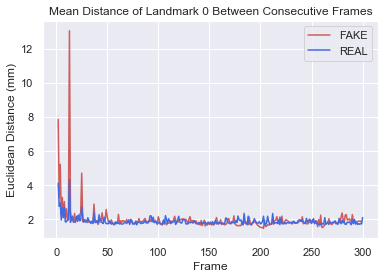

In [114]:
i = 0
plt.figure(figsize=(30,20))
fig, ax = plt.subplots()
ax= sns.lineplot(data=df_fake.groupby('frame').mean()[1:-1:],x=range(2,len(df_fake.groupby('frame').count())), y='landmark_{}'.format(i), label='FAKE', markers=True, color='indianred')
ax1 = sns.lineplot(data=df_real.groupby('frame').mean()[1:-1:],x=range(2,len(df_real.groupby('frame').count())), y='landmark_{}'.format(i), label='REAL', color='royalblue')
plt.title('Mean Distance of Landmark {} Between Consecutive Frames'.format(i))
plt.xlabel('Frame')
plt.ylabel('Euclidean Distance (mm)')
plt.savefig("figures/mean_distance_frames_landmark_{}.png".format(i), dpi=300)

<Figure size 2160x1440 with 0 Axes>

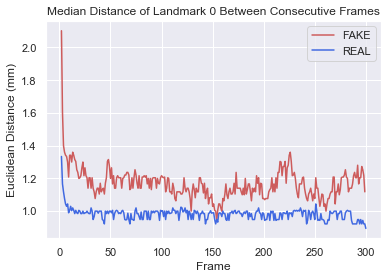

In [11]:
i = 0
plt.figure(figsize=(30,20))
fig, ax = plt.subplots()
ax= sns.lineplot(data=df_fake.groupby('frame').median()[1:-1:],x=range(2,len(df_fake.groupby('frame').count())), y='landmark_{}'.format(i), label='FAKE', markers=True, color='indianred')
ax1 = sns.lineplot(data=df_real.groupby('frame').median()[1:-1:],x=range(2,len(df_real.groupby('frame').count())), y='landmark_{}'.format(i), label='REAL', color='royalblue')
plt.title('Median Distance of Landmark {} Between Consecutive Frames'.format(i))
plt.xlabel('Frame')
plt.ylabel('Euclidean Distance (mm)')
plt.savefig("figures/median_distance_frames_landmark_{}.png".format(i), dpi=300)


### Distance averaged aross all landmarks per frame 


In [2]:
# create array of all the landmark columns
landmark_cols = ['landmark_{}'.format(i) for i in range(0,68)]

In [28]:
sns.set_style("darkgrid")

<Figure size 2160x1440 with 0 Axes>

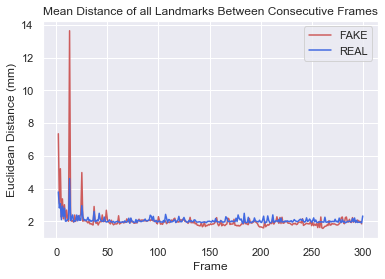

In [112]:

# want to average the distance of each landmark, group by frame 
# y = average distance of all landmarks, x = frame
d_fake = df_fake.groupby('frame').mean()[landmark_cols].mean(axis=1)[1:-1:]
d_real = df_real.groupby('frame').mean()[landmark_cols].mean(axis=1)[1:-1:]

plt.figure(figsize=(30,20))
fig, ax = plt.subplots()
ax= sns.lineplot(data=d_fake, label='FAKE', markers=True, color='indianred')
ax1 = sns.lineplot(data=d_real, label='REAL', color='royalblue')

plt.title('Mean Distance of all Landmarks Between Consecutive Frames')
plt.xlabel('Frame')
plt.ylabel('Euclidean Distance (mm)')
plt.savefig("figures/mean_distance_frames_all_landmark.png", dpi=300)


<Figure size 2160x1440 with 0 Axes>

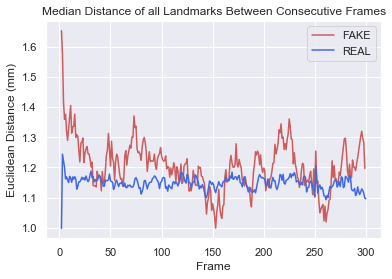

In [295]:
# create array of all the landmark columns
landmark_cols = ['landmark_{}'.format(i) for i in range(0,68)]
# want to average the distance of each landmark, group by frame 
# y = average distance of all landmarks, x = frame
d_fake = df_fake.groupby('frame').median()[landmark_cols].mean(axis=1)[1:-1:]
d_real = df_real.groupby('frame').median()[landmark_cols].mean(axis=1)[1:-1:]

plt.figure(figsize=(30,20))
fig, ax = plt.subplots()
ax= sns.lineplot(data=d_fake, label='FAKE', markers=True, color='indianred')
ax1 = sns.lineplot(data=d_real, label='REAL', color='royalblue')
plt.title('Median Distance of all Landmarks Between Consecutive Frames')
plt.xlabel('Frame')
plt.ylabel('Euclidean Distance (mm)')
plt.savefig("figures/median_distance_frames_all_landmark.png", dpi=300)


### including confidence bars / subplots

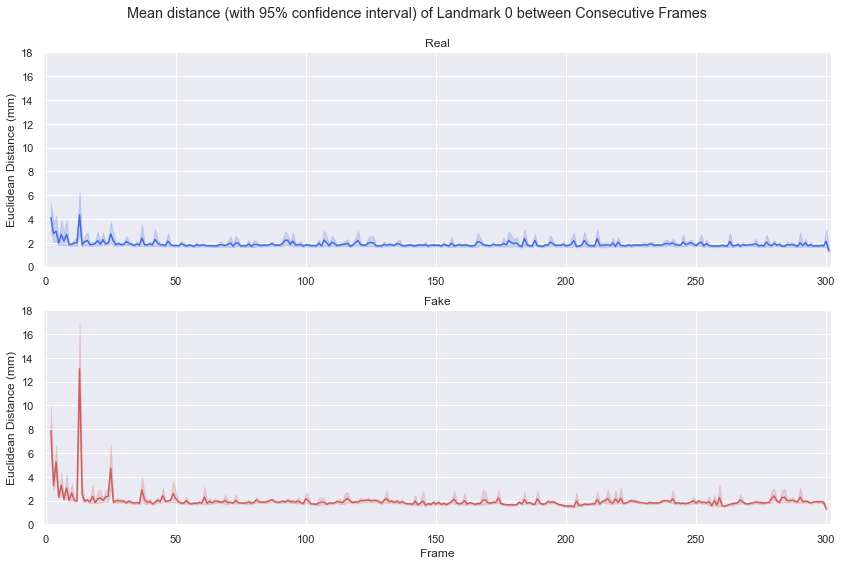

<Figure size 2160x3600 with 0 Axes>

In [293]:
# PER LANDMARK
i=0
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
plt.figure(figsize=(30,50))

sns.lineplot(data=df_real.reset_index(inplace=False)[['frame']+landmark_cols][1:-1:], x='frame', y='landmark_{}'.format(i), ax = axes[0], color='royalblue')
sns.lineplot(data=df_fake.reset_index(inplace=False)[['frame']+landmark_cols][1:-1:], x='frame', y='landmark_{}'.format(i), ax = axes[1], color='indianred')
axes[0].set_title('Real')
axes[1].set_title('Fake')
axes[1].set(xlabel="Frame", ylabel="Euclidean Distance (mm)", ylim=(0,18), xlim=(-1,302))
axes[0].set(xlabel=None, ylabel="Euclidean Distance (mm)", ylim=(0,18), xlim=(-1,302))
fig.suptitle("Mean distance (with 95% confidence interval) of Landmark {} between Consecutive Frames".format(i))
fig.tight_layout()
fig.subplots_adjust(top=.9)

fig.savefig("figures/subplot_mean_landmark_{}.png".format(i), dpi=100)

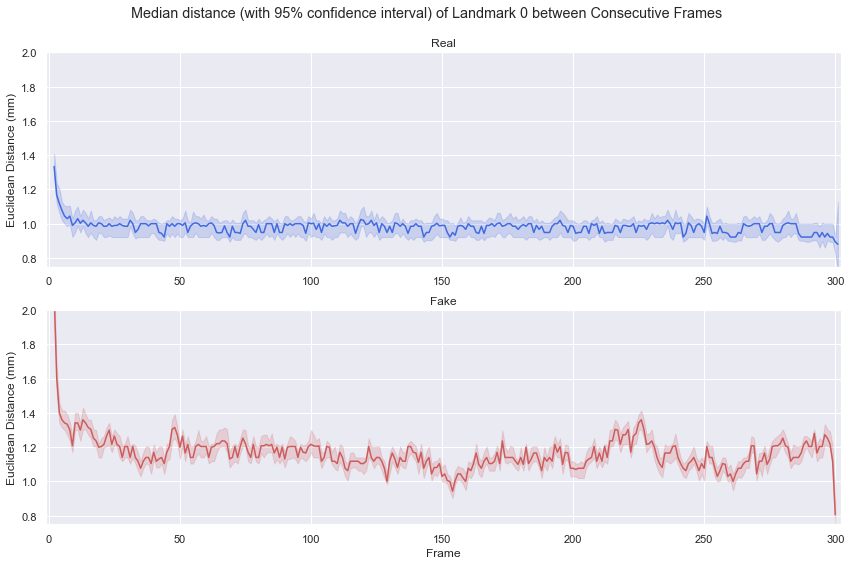

<Figure size 2160x3600 with 0 Axes>

In [305]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
plt.figure(figsize=(30,50))

d_fake = df_fake.reset_index(inplace=False)[['frame']+landmark_cols][1:-1:]
d_real = df_real.reset_index(inplace=False)[['frame']+landmark_cols][1:-1:]

sns.lineplot(data=d_real, x='frame', y='landmark_0', ax = axes[0], color='royalblue', estimator=np.median, markers=True)
sns.lineplot(data=d_fake, x='frame', y='landmark_0', ax = axes[1], color='indianred', estimator=np.median)

axes[0].set_title('Real')
axes[1].set_title('Fake')
axes[1].set(xlabel="Frame", ylabel="Euclidean Distance (mm)", ylim=(0.75,2), xlim=(-1,302))
axes[0].set(xlabel=None, ylabel="Euclidean Distance (mm)", ylim=(0.75,2), xlim=(-1,302))

fig.suptitle("Median distance (with 95% confidence interval) of Landmark 0 between Consecutive Frames")
fig.tight_layout()
fig.subplots_adjust(top=.9)

fig.savefig("figures/subplot_median_landmark_0.png", dpi=100)

<Figure size 2160x1440 with 0 Axes>

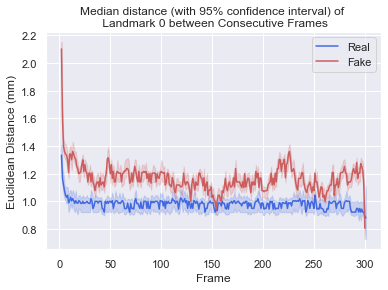

In [307]:
plt.figure(figsize=(30,20))
fig, ax = plt.subplots()

d_fake = df_fake.reset_index(inplace=False)[['frame']+landmark_cols][1:-1:]
d_real = df_real.reset_index(inplace=False)[['frame']+landmark_cols][1:-1:]

ax = sns.lineplot(data=d_real, x='frame', y='landmark_0', color='royalblue', estimator=np.median, label='Real', markers=True)
ax1 = sns.lineplot(data=d_fake, x='frame', y='landmark_0', color='indianred', estimator=np.median, label='Fake')

plt.xlabel("Frame")
plt.ylabel("Euclidean Distance (mm)")
plt.ylim=(0.75,2)
plt.xlim=(-1,302)
plt.title("Median distance (with 95% confidence interval) of \n Landmark 0 between Consecutive Frames")
plt.savefig("figures/median_landmark_0.png", dpi=300)
plt.show()

### averaged over all landmarks

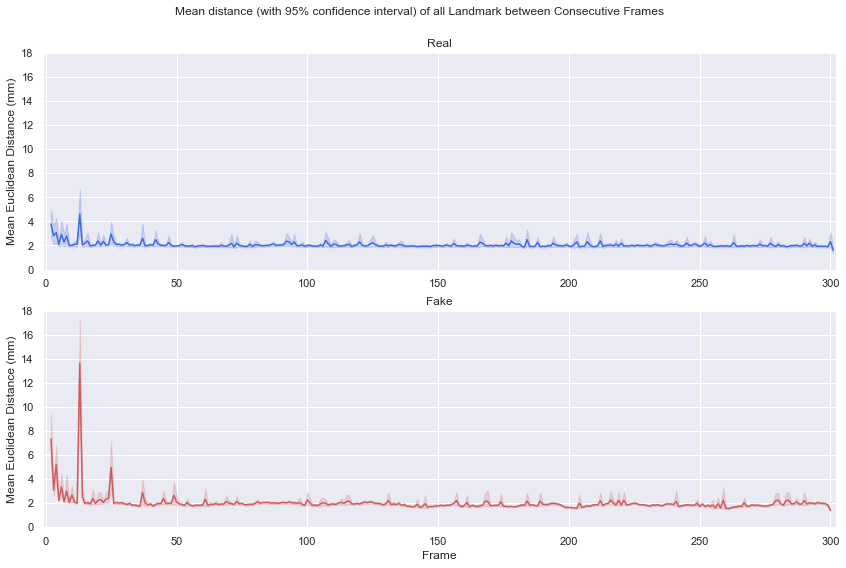

<Figure size 2160x3600 with 0 Axes>

In [69]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
plt.figure(figsize=(30,50))

d_fake = df_fake[landmark_cols].mean(axis=1).reset_index(inplace=False).dropna()
d_real = df_real[landmark_cols].mean(axis=1).reset_index(inplace=False).dropna()

ax = sns.lineplot(data=d_real, x='frame', y=0, color='royalblue',  markers=True, ax = axes[0])
ax1 = sns.lineplot(data=d_fake, x='frame', y=0, color='indianred', estimator=np.mean, ax=axes[1])

axes[0].set_title('Real')
axes[1].set_title('Fake')
axes[1].set(xlabel="Frame", ylabel="Mean Euclidean Distance (mm)", ylim=(0,18), xlim=(-1,302))
axes[0].set(xlabel=None, ylabel="Mean Euclidean Distance (mm)", ylim=(0,18), xlim=(-1,302))
fig.suptitle("Mean distance (with 95% confidence interval) of all Landmark between Consecutive Frames")
fig.tight_layout()
fig.subplots_adjust(top=.9)

fig.savefig("figures/subplot_mean_all_landmark.png", dpi=300)

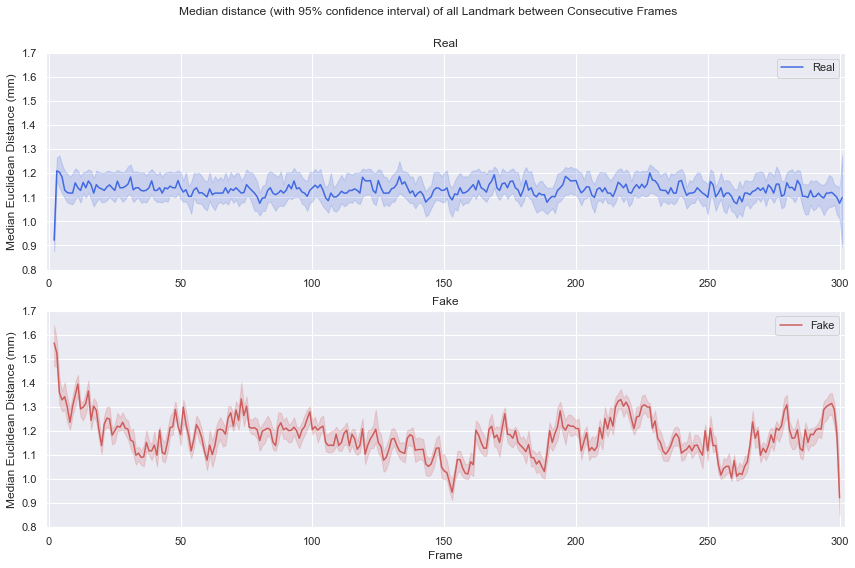

<Figure size 2160x3600 with 0 Axes>

In [73]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
plt.figure(figsize=(30,50))

d_fake = df_fake[landmark_cols].median(axis=1).reset_index(inplace=False).dropna()
d_real = df_real[landmark_cols].median(axis=1).reset_index(inplace=False).dropna()

ax = sns.lineplot(data=d_real, x='frame', y=0, color='royalblue', estimator=np.median,label='Real', markers=True, ax = axes[0])
ax1 = sns.lineplot(data=d_fake, x='frame', y=0, color='indianred', estimator=np.median, label='Fake', ax=axes[1])

axes[0].set_title('Real')
axes[1].set_title('Fake')
axes[1].set(xlabel="Frame", ylabel="Median Euclidean Distance (mm)",ylim=(0.8, 1.7), xlim=(-1,302))
axes[0].set(xlabel=None, ylabel="Median Euclidean Distance (mm)",ylim=(0.8, 1.7), xlim=(-1,302))
fig.suptitle("Median distance (with 95% confidence interval) of all Landmark between Consecutive Frames")
fig.tight_layout()
fig.subplots_adjust(top=.9)

fig.savefig("figures/subplot_median_all_landmark.png", dpi=300)

In [132]:
df_fake[landmark_cols].min(axis=1).reset_index(inplace=False).dropna().groupby()

,filename,frame,0
1,aaaoqepxnf.mp4,2,0.000000
2,aaaoqepxnf.mp4,3,0.000000
3,aaaoqepxnf.mp4,4,0.000000
4,aaaoqepxnf.mp4,5,0.100000
5,aaaoqepxnf.mp4,6,0.000000
6,aaaoqepxnf.mp4,7,0.000000
7,aaaoqepxnf.mp4,8,0.316228
8,aaaoqepxnf.mp4,9,0.000000
9,aaaoqepxnf.mp4,10,0.100000
10,aaaoqepxnf.mp4,11,0.100000


## Plots per landmark

Have to convert table to

| landmark | filename 1                      |   ...    |   
|----------|---------------------------------|----------|
|landmark_0| avg(frames) for file1.landmark_0|          |
|landmark_1|...                              |          | 


In [5]:
d_fake = df_fake[landmark_cols]
#rename from 'landmark_0' to just '0' so it sorts right
d_fake.columns = [i for i in range(0,68)]
d_fake.columns.name = 'landmarks'
s_fake = d_fake.stack()
s_fake.name = 'value'
s_fake = s_fake.reset_index()

In [6]:
d_real = df_real[landmark_cols]
#rename from 'landmark_0' to just '0' so it sorts right
d_real.columns = [i for i in range(0,68)]
d_real.columns.name = 'landmarks'
s_real = d_real.stack()
s_real.name = 'value'
s_real = s_real.reset_index()


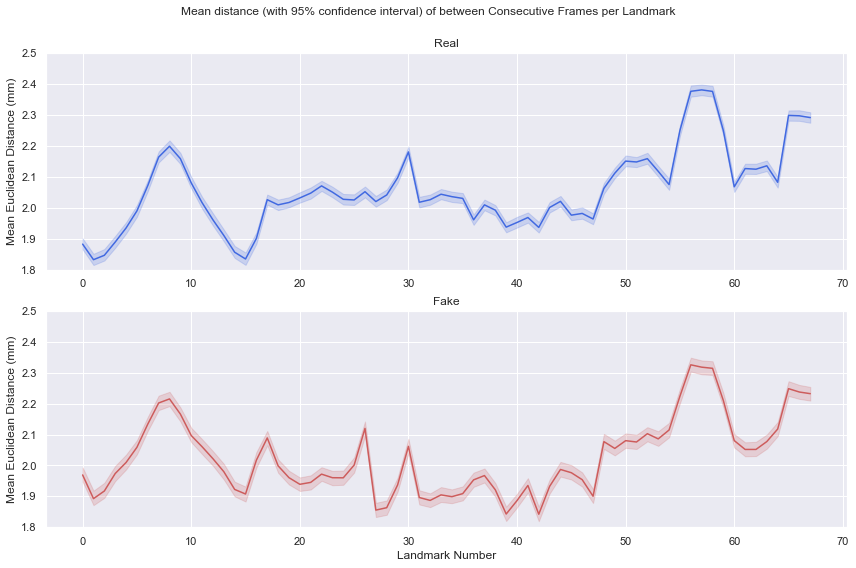

<Figure size 2160x3600 with 0 Axes>

In [115]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
plt.figure(figsize=(30,50))

ax = sns.lineplot(data=s_real, x='landmarks', y='value', color='royalblue', markers=True, ax = axes[0])
ax1 = sns.lineplot(data=s_fake, x='landmarks', y='value', color='indianred', ax=axes[1])

axes[0].set_title('Real')
axes[1].set_title('Fake')
axes[1].set(xlabel="Landmark Number", ylabel="Mean Euclidean Distance (mm)", ylim=(1.8,2.5))
axes[0].set(xlabel=None, ylabel="Mean Euclidean Distance (mm)", ylim=(1.8,2.5))
fig.suptitle("Mean distance (with 95% confidence interval) of between Consecutive Frames per Landmark")
fig.tight_layout()
fig.subplots_adjust(top=.9)

fig.savefig("figures/per_landmark_mean_subplot.png", dpi=300)

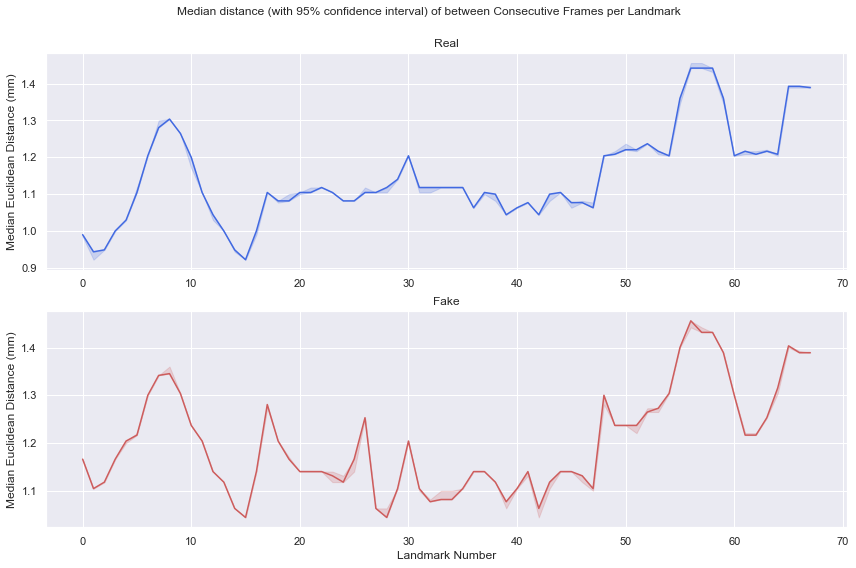

<Figure size 2160x3600 with 0 Axes>

In [108]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
plt.figure(figsize=(30,50))

ax = sns.lineplot(data=s_real, x='landmarks', y='value',  estimator=np.median,color='royalblue', markers=True, ax = axes[0])
ax1 = sns.lineplot(data=s_fake, x='landmarks', y='value', estimator=np.median, color='indianred', ax=axes[1])

axes[0].set_title('Real')
axes[1].set_title('Fake')
axes[1].set(xlabel="Landmark Number", ylabel="Median Euclidean Distance (mm)", ylim=(0.9,1.5))
axes[0].set(xlabel=None, ylabel="Median Euclidean Distance (mm)")
fig.suptitle("Median distance (with 95% confidence interval) of between Consecutive Frames per Landmark")
fig.tight_layout()
fig.subplots_adjust(top=.9)

fig.savefig("figures/per_landmark_median_subplot.png", dpi=300)

<Figure size 2160x1440 with 0 Axes>

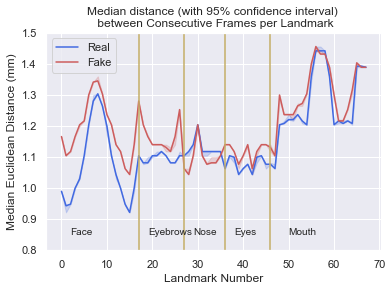

In [120]:
plt.figure(figsize=(30,20))
fig, ax = plt.subplots()

ax = sns.lineplot(data=s_real, x='landmarks', y='value', color='royalblue', estimator=np.median, label='Real', markers=True)
ax1 = sns.lineplot(data=s_fake, x='landmarks', y='value', color='indianred', estimator=np.median, label='Fake')

ax.set(ylim=(0.8,1.5))
plt.ylim=(0.8,1.5)
plt.xlabel("Landmark Number")
plt.ylabel("Median Euclidean Distance (mm)")
# 1-17: face 
# 18-27: eyebrow
# 28-36: nose
# 37-46: eye
# 47-68: mouth
'''
YOU WANT AV SPAN YOU FOOL
'''
plt.annotate('Face', xy=(2,0.85))
plt.axvline(x=17,color='#C4AD66')
plt.annotate('Eyebrows', xy=(19,0.85))
plt.axvline(x=27,color='#C4AD66')
plt.annotate('Nose', xy=(29,0.85))
plt.axvline(x=36,color='#C4AD66')
plt.annotate('Eyes', xy=(38,0.85))
plt.axvline(x=46,color='#C4AD66')
plt.annotate('Mouth', xy=(50, 0.85))


plt.title("Median distance (with 95% confidence interval) \n between Consecutive Frames per Landmark")
plt.savefig("figures/per_landmark_median.png", dpi=300)
plt.show()

# What to do about outliers 
Since apparently theres a few outliers... can take the confidence into account

In [70]:
c = pd.concat([df_real,df_fake],ignore_index=True)
c

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,confidence,face_id,label,landmark_0,landmark_1,landmark_10,landmark_11,landmark_12,landmark_13,landmark_14,...,y_61,y_62,y_63,y_64,y_65,y_66,y_67,y_7,y_8,y_9
0,0.98,0,REAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,188.7,189.7,189.6,191.3,191.7,192.1,191.2,224.4,226.2,224.3
1,0.98,0,REAL,0.984886,0.900000,1.360147,1.216553,1.044031,0.894427,0.640312,...,188.7,189.7,189.5,191.5,192.2,192.6,191.8,226.1,227.9,225.8
2,0.98,0,REAL,0.905539,0.500000,1.280625,1.280625,1.208305,0.800000,0.538516,...,188.7,189.7,189.5,191.5,192.5,192.8,191.9,225.7,227.8,226.1
3,0.98,0,REAL,0.360555,0.100000,0.412311,0.500000,0.500000,0.640312,0.500000,...,188.6,189.6,189.4,191.3,192.9,193.2,192.3,225.1,227.4,225.8
4,0.98,0,REAL,1.315295,0.905539,0.100000,0.141421,0.100000,0.000000,0.200000,...,188.7,189.6,189.4,191.1,193.0,193.4,192.6,224.9,227.3,225.7
5,0.98,0,REAL,0.100000,0.223607,0.360555,0.360555,0.412311,0.360555,0.223607,...,187.8,188.7,188.5,190.8,193.5,193.8,193.0,225.4,227.7,226.0
6,0.93,0,REAL,0.860233,0.538516,1.140175,1.208305,1.140175,1.200000,1.004988,...,187.2,188.0,187.7,190.0,192.9,193.3,192.6,225.5,227.5,225.4
7,0.98,0,REAL,0.424264,0.424264,0.921954,0.632456,0.500000,0.500000,0.583095,...,186.1,186.9,186.8,189.7,192.5,192.8,192.0,224.6,226.8,225.1
8,0.98,0,REAL,0.412311,0.424264,1.044031,0.640312,0.424264,0.282843,0.509902,...,184.8,185.6,185.4,187.9,189.9,190.2,189.5,222.8,224.9,223.4
9,0.93,0,REAL,0.640312,0.948683,1.403567,1.503330,1.513275,1.612452,1.603122,...,183.8,184.6,184.3,186.4,188.5,189.0,188.2,221.5,223.8,222.3


Text(0.5, 0, 'Confidence')

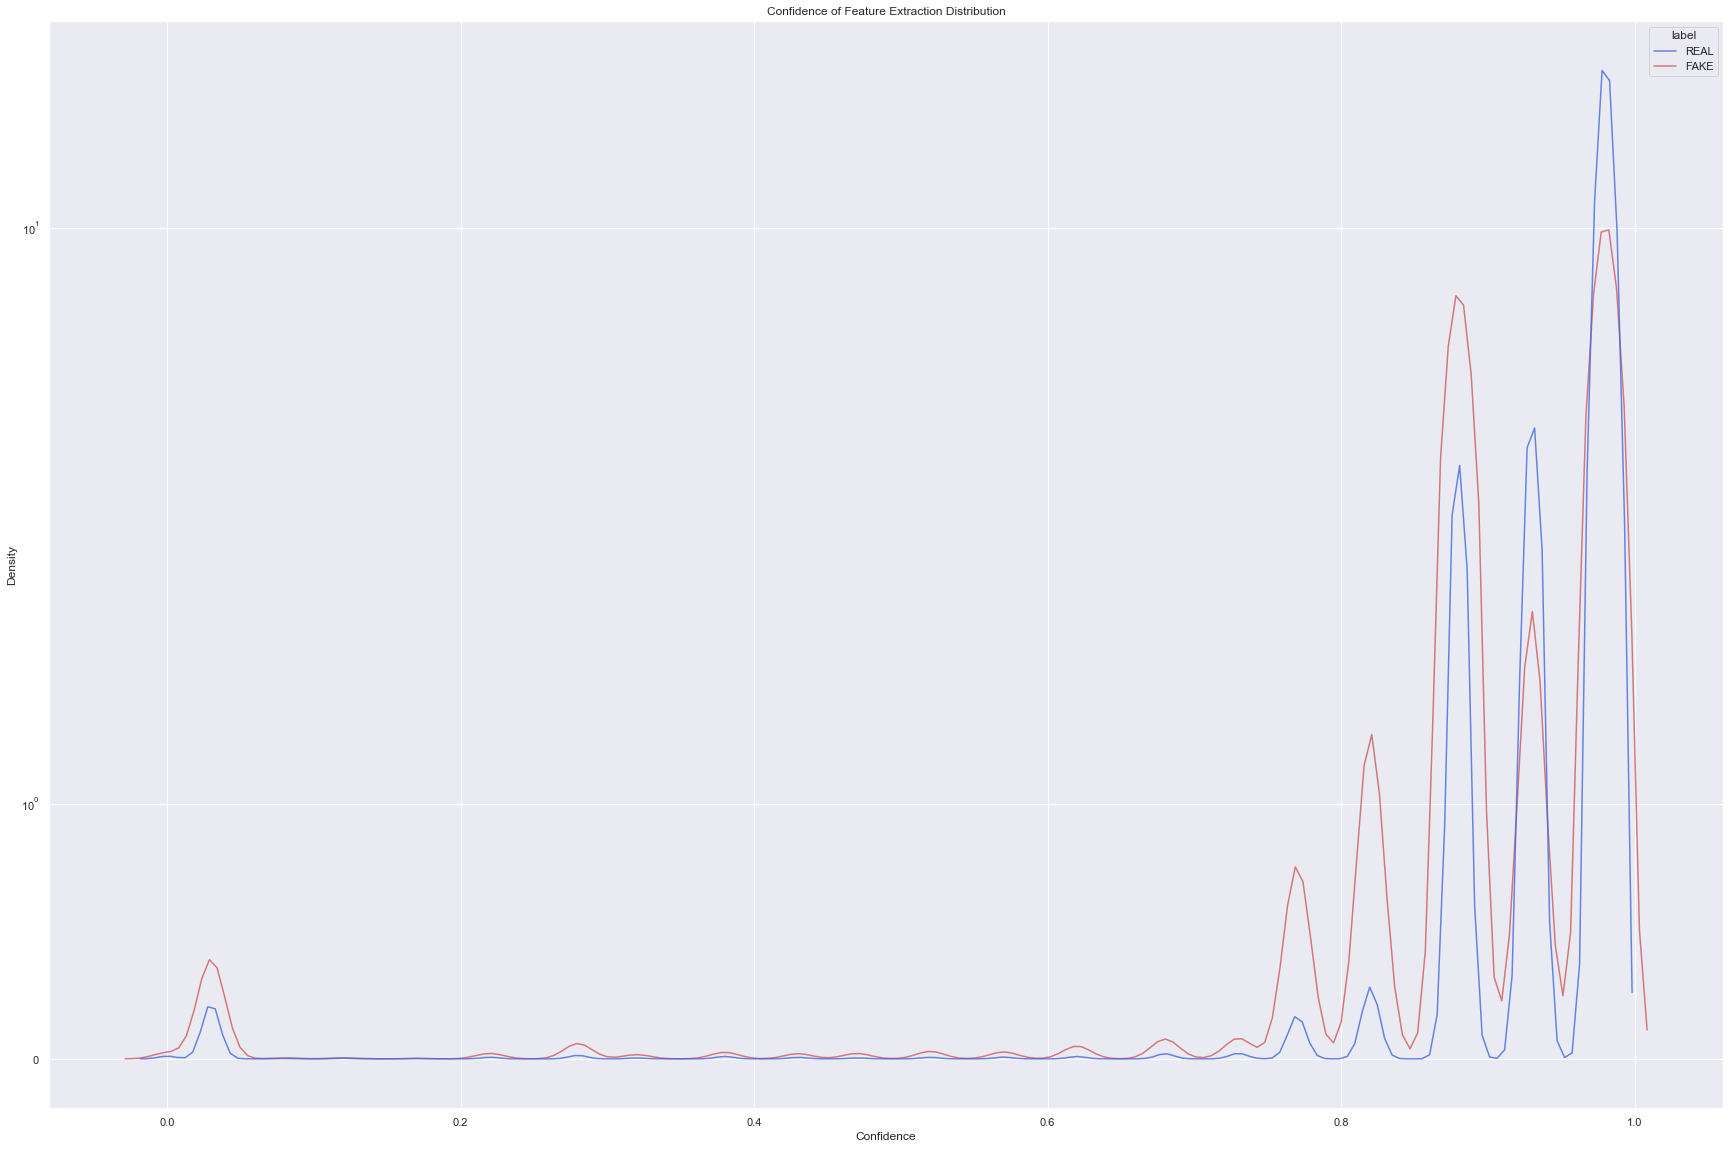

In [97]:
plt.figure(figsize=(30,20))

ax = sns.kdeplot(data=c, x='confidence',hue="label", palette={"REAL":"royalblue","FAKE":"indianred"},alpha=0.8)
plt.yscale('symlog')
plt.title('Confidence of Feature Extraction Distribution')
plt.xlabel('Confidence')

In [106]:
# confidence of a frame vs avg.distance in frame?
# see if the high distances are from low confidence
c = pd.concat([df_real,df_fake]).reset_index()
c

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,filename,frame,confidence,face_id,label,landmark_0,landmark_1,landmark_10,landmark_11,landmark_12,...,y_61,y_62,y_63,y_64,y_65,y_66,y_67,y_7,y_8,y_9
0,aagumdmtjk.mp4,1,0.98,0,REAL,NaN,NaN,NaN,NaN,NaN,...,188.7,189.7,189.6,191.3,191.7,192.1,191.2,224.4,226.2,224.3
1,aagumdmtjk.mp4,2,0.98,0,REAL,0.984886,0.900000,1.360147,1.216553,1.044031,...,188.7,189.7,189.5,191.5,192.2,192.6,191.8,226.1,227.9,225.8
2,aagumdmtjk.mp4,3,0.98,0,REAL,0.905539,0.500000,1.280625,1.280625,1.208305,...,188.7,189.7,189.5,191.5,192.5,192.8,191.9,225.7,227.8,226.1
3,aagumdmtjk.mp4,4,0.98,0,REAL,0.360555,0.100000,0.412311,0.500000,0.500000,...,188.6,189.6,189.4,191.3,192.9,193.2,192.3,225.1,227.4,225.8
4,aagumdmtjk.mp4,5,0.98,0,REAL,1.315295,0.905539,0.100000,0.141421,0.100000,...,188.7,189.6,189.4,191.1,193.0,193.4,192.6,224.9,227.3,225.7
5,aagumdmtjk.mp4,6,0.98,0,REAL,0.100000,0.223607,0.360555,0.360555,0.412311,...,187.8,188.7,188.5,190.8,193.5,193.8,193.0,225.4,227.7,226.0
6,aagumdmtjk.mp4,7,0.93,0,REAL,0.860233,0.538516,1.140175,1.208305,1.140175,...,187.2,188.0,187.7,190.0,192.9,193.3,192.6,225.5,227.5,225.4
7,aagumdmtjk.mp4,8,0.98,0,REAL,0.424264,0.424264,0.921954,0.632456,0.500000,...,186.1,186.9,186.8,189.7,192.5,192.8,192.0,224.6,226.8,225.1
8,aagumdmtjk.mp4,9,0.98,0,REAL,0.412311,0.424264,1.044031,0.640312,0.424264,...,184.8,185.6,185.4,187.9,189.9,190.2,189.5,222.8,224.9,223.4
9,aagumdmtjk.mp4,10,0.93,0,REAL,0.640312,0.948683,1.403567,1.503330,1.513275,...,183.8,184.6,184.3,186.4,188.5,189.0,188.2,221.5,223.8,222.3


In [122]:
c1 = c.groupby(['filename','label','frame', ]).mean()

In [124]:
c1['landmark_mean'] = c1[landmark_cols].mean(axis=1)

<Figure size 3600x2160 with 0 Axes>

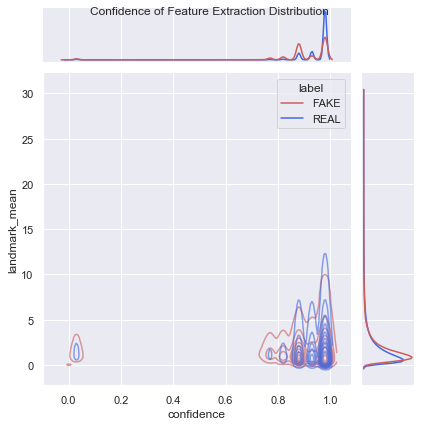

In [152]:
plt.figure(figsize=(50,30))
#confidence of outliers?
ax = sns.jointplot(data=c1[c1.landmark_mean < 30].reset_index(), x='confidence', y='landmark_mean', kind='kde', dropna=True, hue='label',
palette={"REAL":"royalblue","FAKE":"indianred"}, alpha=0.6)
#plt.yscale('symlog')
#plt.title('Confidence of Feature Extraction Distribution')
plt.xlabel('Confidence')
plt.ylabel('Average Landmark Distance')
plt.suptitle("Confidence of Feature Extraction Distribution")
plt.savefig("figures/confidence_feature_joint.png", dpi=300)


<Figure size 3600x2160 with 0 Axes>

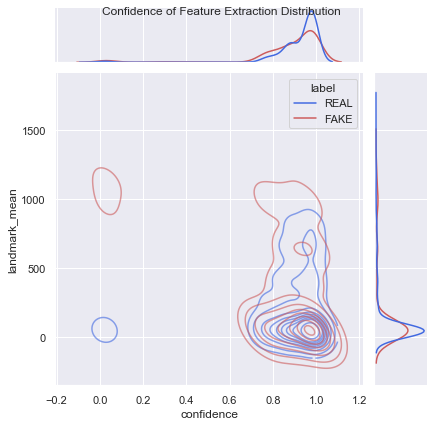

In [151]:
plt.figure(figsize=(50,30))
#confidence of outliers?
ax = sns.jointplot(data=c1[c1.landmark_mean > 30].reset_index(), x='confidence', y='landmark_mean', kind='kde', dropna=True, hue='label',
palette={"REAL":"royalblue","FAKE":"indianred"}, alpha=0.6)
#plt.yscale('symlog')
#plt.title('Confidence of Feature Extraction Distribution')
plt.xlabel('Confidence')
plt.ylabel('Average Landmark Distance')
plt.suptitle("Confidence of Feature Extraction Distribution")
plt.savefig("figures/confidence_feature_joint_outliers.png", dpi=300)


# Predict Next Landmark Distance

Have file, frame, confidence, x_0, ..., x_67, y_0, ... , y_67
want to predict for $$frame+1 | frames -> \hat{x}_0,... \hat{y}_{67}$$

1. Import the data frame
2. Split into train/test/validate 
3. Perform SVR on the landmarks 
$$ X = (x_0^0, y_0^0), (x_0^1, y_0^1) ... (x_0^{67}, y_0^{67}) $$
$$ y (X+1) = (x_1^0, y_1^0), (x_1^1, y_1^1) ... (x_1^{67}, y_1^{67})) $$

In [44]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import train_test_split

df = pd.read_csv('cleaned_data.csv', index_col=['filename', 'frame'])
df.dropna(inplace=True)

/Users/kyramozley/Library/Python/3.7/lib/python/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
x_feature_cols = ['x_{}'.format(i) for i in range(0,68)]
y_feature_cols = ['y_{}'.format(i) for i in range(0,68)]
feature_cols = x_feature_cols+y_feature_cols

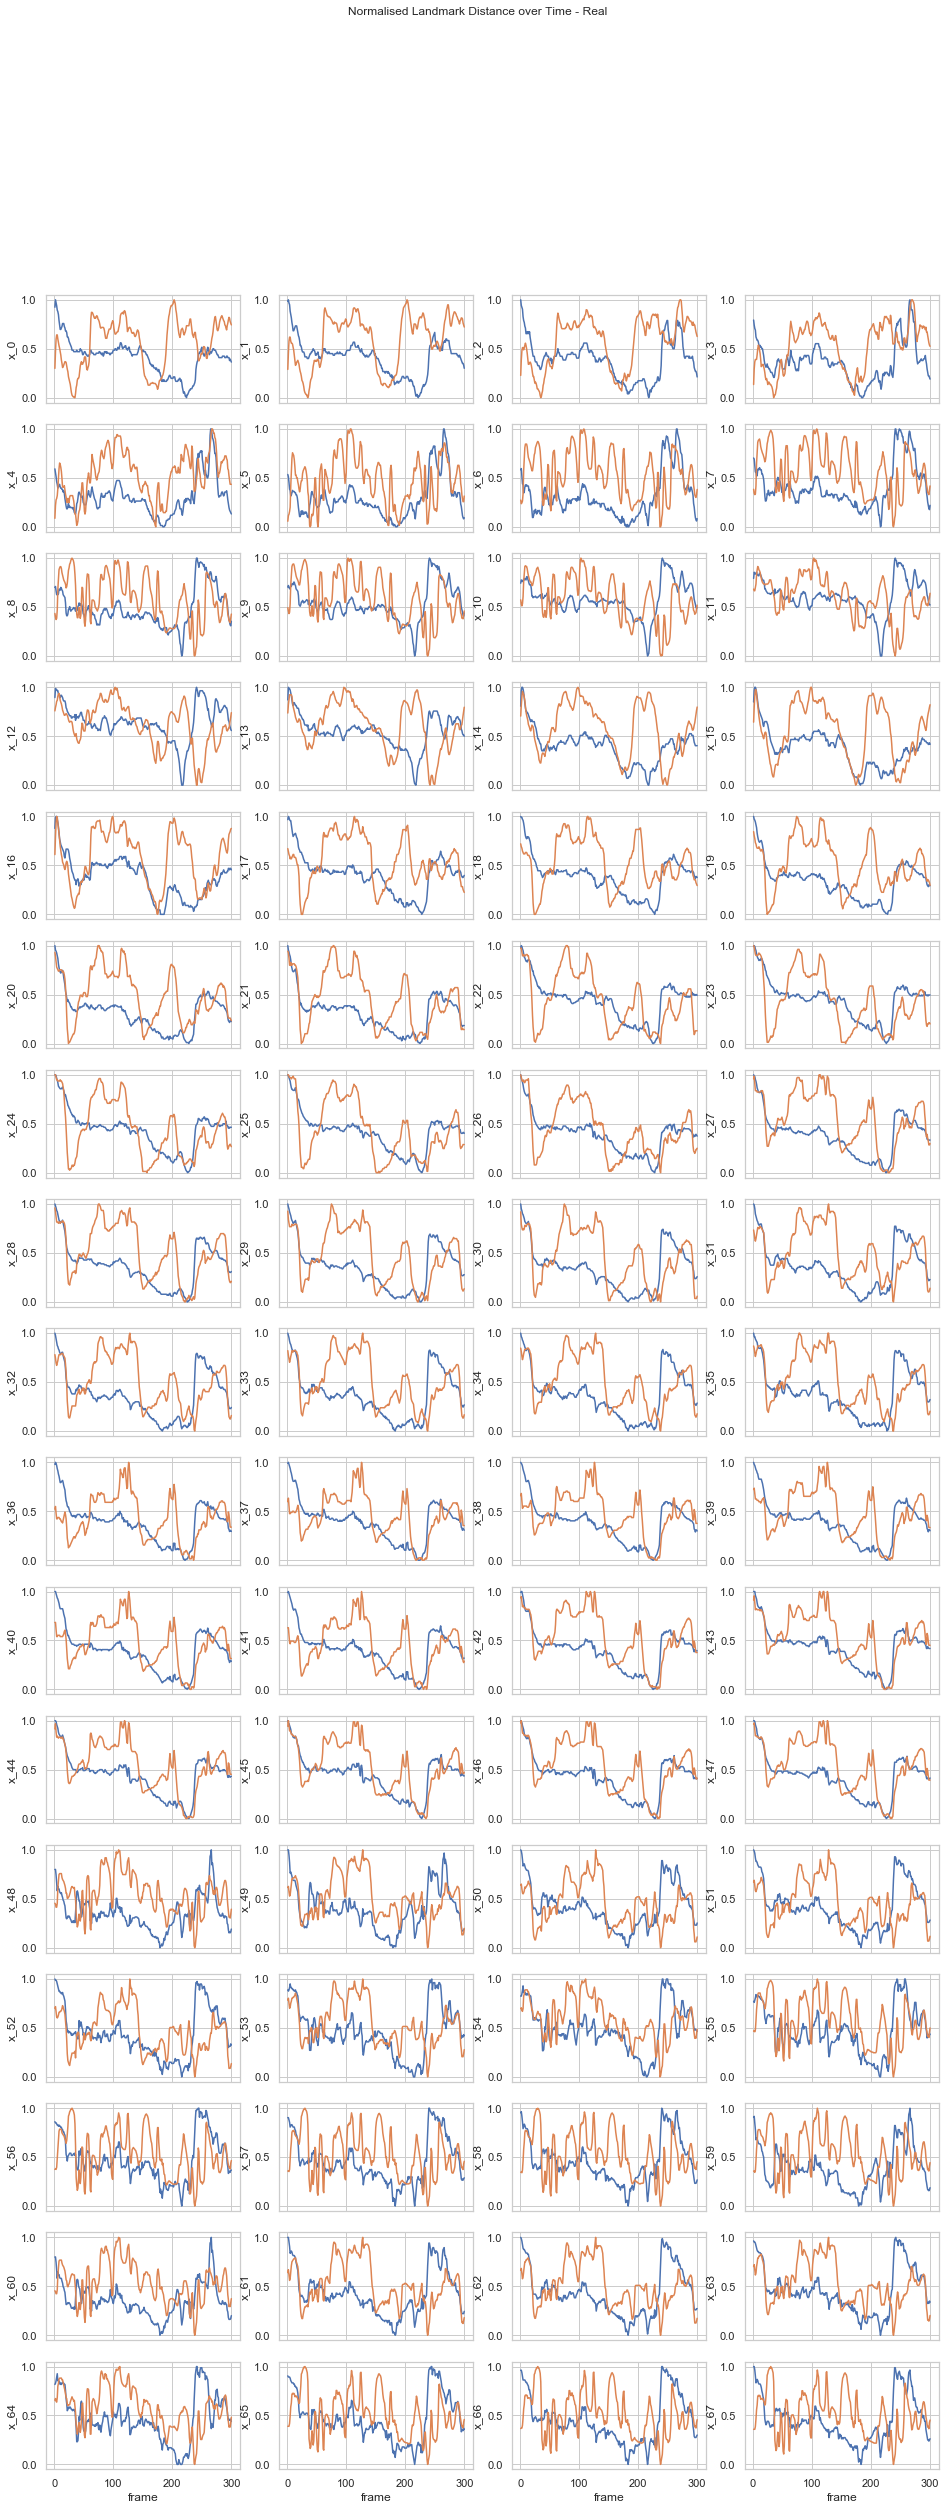

In [31]:
real = "zzpbsapyyf.mp4"
fake = "aaaoqepxnf.mp4"

sns.set_style("whitegrid")


fig, axes = plt.subplots(17, 4, sharex=True, figsize=(16,40))
fig.suptitle('Normalised Landmark Distance over Time - Real')

for i, ax in zip(range(68), axes.flat):
    x = df.loc[real]['x_{}'.format(i)]
    y = df.loc[real]['y_{}'.format(i)]

    x_min = x.min()
    x_max = x.max()

    y_min = y.min()
    y_max = y.max()

    x = (x-x_min)/(x_max-x_min)
    y = (y-y_min)/(y_max-y_min)
    sns.lineplot(data=x, ax=ax)
    sns.lineplot(data=y, ax=ax)
plt.show()


In [18]:
X = df[feature_cols].as_matrix()[0:len(df)-1:]
y = df[feature_cols].as_matrix()[1:len(df):]
print(X.shape, y.shape)
#convert real/fake to numbers
#labels = {"REAL":0, "FAKE":1}
#y=np.vectorize(labels.get)(y)

(1754607, 136) (1754607, 136)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_texst_split(X_test, y_test, test_size=0.5, random_state=42)

In [20]:
X_train.shape

(1403685, 136)

# Alternatively... 

we can remove the build up of errors and just measure the difference and pass this to an SVM for binary classificaton 

features = [distances]

[filename, frame1: landmark0, landmark1...
           frame2: landmark0, landmark1...
           ...
           frame 300:landmark0, landmark1...
]
67 landmarks per frame 
normally 300 frames per video

If plotting distances it doesnt matter about sequential since thats already got the next frame in it! 



In [33]:
df_fake = pd.read_csv('cleaned_data_fake.csv', header=0, index_col=['filename', 'frame'])
df_real = pd.read_csv('cleaned_data_real.csv', header=0, index_col=['filename', 'frame'])


In [34]:
df = pd.concat([df_real,df_fake]).reset_index()
landmark_cols = ['landmark_{}'.format(i) for i in range(0,68)]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [35]:
df.dropna(inplace=True)

In [36]:
X = df[landmark_cols].as_matrix()
y = df['label'].as_matrix()
print(X.shape, y.shape)
#convert real/fake to numbers
labels = {"REAL":0, "FAKE":1}
y=np.vectorize(labels.get)(y)

(1748699, 68) (1748699,)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [50]:
classifier = svm.SVC(kernel='rbf')
classifier.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
y_pred = classifier.predict(X_val)

In [ ]:
accuracy_score(y_val, y_pred)

0.572